### Load images

In [2]:
import rasterio

# main folder
_train = r'..\data\spacenet_sample\AOI_2_Vegas_Train'


# geojson
_geo = r'\geojson\buildings\buildings_AOI_2_Vegas_img'
# '.geojson'

# MUL 8-Band Multi-Spectral 
_8bands = r'\MUL\MUL_AOI_2_Vegas_img'

# MUL-PanSharpen 8-Band Multi-Spectral 
_MulPan =  r'\MUL-PanSharpen\MUL-PanSharpen_AOI_2_Vegas_img'

# PAN
_Pan =  r'\PAN\PAN_AOI_2_Vegas_img'

# RGB
_RGB = r'\RGB-PanSharpen\RGB-PanSharpen_AOI_2_Vegas_img'

# '.tif'

# summaryData
_sum = r'\summaryData\AOI_2_Vegas_Train_Building_Solutions.csv'

# images
images = [r'225',r'246',r'802',r'1265',r'1385',r'1488',r'2144',r'2636',r'5184',r'5874']

ds8bands = rasterio.open(_train+_8bands+images[0]+'.tif')
print(ds8bands.read(1))
print(ds8bands.count)
print(ds8bands.width)
print(ds8bands.height)
print(ds8bands.bounds)

print('')

dsMulPan = rasterio.open(_train+_MulPan+images[0]+'.tif')
print(dsMulPan.count)
print(dsMulPan.width)
print(dsMulPan.height)
print(dsMulPan.bounds)

print('')

dsPan = rasterio.open(_train+_Pan+images[0]+'.tif')
print(dsPan.count)
print(dsPan.width)
print(dsPan.height)
print(dsPan.bounds)

print('')

dsRGB = rasterio.open(_train+_RGB+images[0]+'.tif')
print(dsRGB.read(1))
print(dsRGB.count)
print(dsRGB.width)
print(dsRGB.height)
print(dsRGB.bounds)

[[374 243 230 ... 227 334 364]
 [345 231 218 ... 209 283 332]
 [340 216 224 ... 194 259 331]
 ...
 [199 201 212 ... 265 234 199]
 [219 218 222 ... 271 251 205]
 [218 209 208 ... 210 221 227]]
8
163
163
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)

8
650
650
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)

1
650
650
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)

[[674 627 566 ... 487 506 524]
 [669 644 551 ... 487 512 589]
 [667 641 566 ... 520 509 545]
 ...
 [127 115 181 ... 249 229 221]
 [151 211 267 ... 264 219 177]
 [145 130 160 ... 219 196 169]]
3
650
650
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)


### Look at the extremum value of the images. It's uint16 rather than uint8

In [20]:
b = dsRGB.read(1)
print(b.max())
print(b.min())

b = dsRGB.read(2)
print(b.max())
print(b.min())

b = dsRGB.read(3)
print(b.max())
print(b.min())

# It is uint16, so the maximum value is 65535
# Somehow, they are very dark and the maximym is only 1817

1537
1
1817
71
1267
82


### Plot an example of an image

#### RGB

(650, 650, 3)


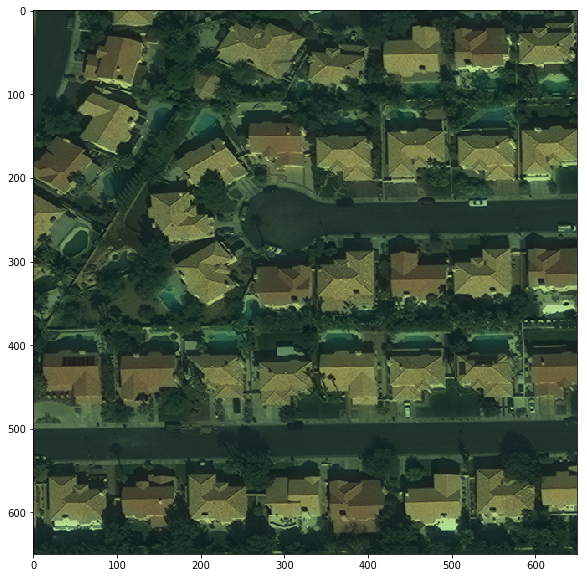

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
plt.figure(figsize=(12, 10))
m = (np.rollaxis(np.array([dsRGB.read(1),dsRGB.read(2),dsRGB.read(3)]),0,3)/2000)
print(m.shape)

plt.imshow(m);

#### Pan

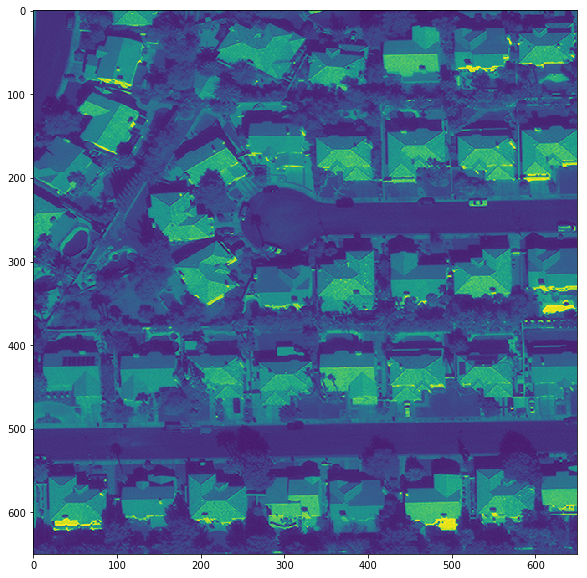

In [18]:
dsPan
plt.figure(figsize=(12, 10))
m = dsPan.read(1)/2000
plt.imshow(m);

### Summary file, it contains the coordinate of each building

In [30]:
import pandas as pd

df = pd.read_csv(_train+_sum)
df.head()

,ImageId,BuildingId,PolygonWKT_Pix,PolygonWKT_Geo
0,AOI_2_Vegas_img2144,1,"POLYGON ((571.34 510.8 0,496.2 516.23 0,500.02...",POLYGON ((-115.246304971999962 36.198873544000...
1,AOI_2_Vegas_img2144,2,"POLYGON ((627.03 560.04 0,623.45 575.78 0,642....",POLYGON ((-115.246154624999974 36.198740595000...
2,AOI_2_Vegas_img2144,3,"POLYGON ((625.08 493.14 0,619.17 510.61 0,612....",POLYGON ((-115.246159889999902 36.198921227000...
3,AOI_2_Vegas_img2144,4,"POLYGON ((650.0 555.14 0,650.0 545.56 0,646.99...",POLYGON ((-115.246092599877571 36.198753830681...
4,AOI_2_Vegas_img2144,5,"POLYGON ((633.23 397.99 0,610.57 459.43 0,650....",POLYGON ((-115.246137888999954 36.199178125000...


### Use geojson mask

It seems to mostly keep the buildings, but there are also 2 small rectangles at line 400, so it doesn't seem to be perfect

(3, 620, 650)
(620, 650, 3)


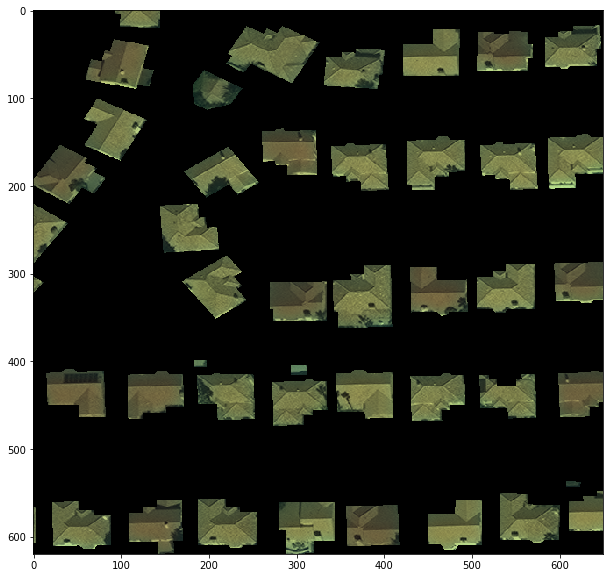

In [17]:
# use geojson
from rasterio.tools.mask import mask
import json

with open(_train+_geo+images[0]+'.geojson') as data_file:
        data = json.loads(data_file.read())
#
 
geoms = [d['geometry'] for d in data['features']]
out_image, out_transform = mask(dsRGB, geoms, crop=True) 

print(out_image.shape)
out_image = np.rollaxis(out_image,0,3)/2000
print(out_image.shape)
plt.figure(figsize=(12, 10))
plt.imshow(out_image);